<a href="https://colab.research.google.com/github/khalil753/Bio-Project/blob/master/Data2Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mounting libraries and defining global variables**

In [0]:
import fastai
from fastai.vision import *
from fastai.widgets import *

import numpy as np
import pandas as pd

from pathlib import Path
import os
from os import listdir

import matplotlib as mpl
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import tensor

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
path = Path(r"/content/gdrive/My Drive/Mestría en Física de Sistemas Complejos/Tercer semestre/Inference in Biological Systems/Project")
path_data = path/'data'
classes = ['healthy', 'tumor', 'injury']

# **Loading the data**

## As numpy arrays

In [21]:
files = listdir(path)
for file in files:
  file = Path(file)
  if file.suffix == '.npy':
    print(file)
    file_stem = str(file.stem)
    if file_stem == 'real_classes_test' or file_stem == 'real_classes_train':
      exec(f'{file_stem} = np.load(path/file, allow_pickle = True)') 
    else: 
      exec(f'{file_stem} = np.load(path/file, allow_pickle = True)')
X_val = X_test
Y_val = Y_test

X_train.npy
X_test.npy
Y_train.npy
real_classes_test.npy
Y_test.npy
real_classes_train.npy


## Transforming the data into rgb [0:255]

To save the arrays as png images, they must contain integers from 0 to 255. the changeRGBtype function takes care of that.

In [0]:
def flatten(X):
    org_shape = X.shape
    n_pixel = torch.tensor(org_shape[1:]).prod().item()
    X = X.view((-1,n_pixel))
    return X, org_shape

def changeRGBtype(X):
  X = torch.tensor(X)
  X, org_shape = flatten(X)
  X -= X.min(axis=1)[0].unsqueeze(-1)
  X /= 2
  X *= 255
  return np.array(X.view(org_shape)).astype(np.uint8)


In [0]:
X_val = changeRGBtype(X_val)
X_train = changeRGBtype(X_train)

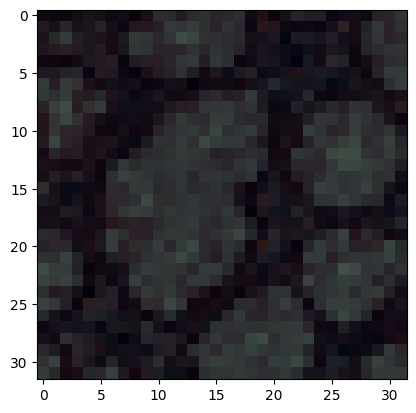

In [24]:
imshow(X_val[3])

# **Saving Images in folders**

These functions create the folder structure and save the images there. The structure consists of two folders, onw called train and other called val, for training and validation images respectively. Inside of each, there's a folder for each class, namely, healthy, tumor and injury.

In [0]:
def create_folders(path, fnames, classes):
  for name in fnames:
    if not os.path.isdir(path/name): 
      os.mkdir(path/name)      
    for label in classes:
      if not os.path.isdir(path/name/label):     
        os.mkdir(path/name/label)

def save_imgs(path, X, y, classes):
  labels = map(lambda x: classes[x], y)
  c = len(classes)
  count = dict([*zip(classes, np.zeros(c, dtype=np.int))])
  for x, label in zip(X, labels):
    im = Image.fromarray(x)
    count[label] += 1
    n_class = count[label]
    path_img = path/label/f'{n_class}.png'
    if not os.path.isfile(path_img): im.save(path_img) 

In [0]:
def npdata2folder(path, X_train, y_train, X_val, y_val, classes):
  fnames = ['val', 'train']
  create_folders(path, fnames, classes)

  data_sets = [X_val, X_train]
  data_labels = [y_val, y_train]
  for X, y, fname in zip(data_sets, data_labels, fnames):   
    save_imgs(path/fname, X, y, classes)

In [0]:
path_data = path/'data'
if not os.path.isdir(path_data): os.mkdir(path_data) 

n = -1
npdata2folder(path_data, X_train[:n], Y_train[:n], X_val[:n], Y_val[:n], classes)